# 均方误差

In [73]:
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt

In [74]:
Latex(r"$ E = \frac{1}{2}\sum_k{(y_k-t_k)^2}$")

<IPython.core.display.Latex object>

In [75]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [76]:
t = [0, 0, 1, 0, 0, 0, 0 , 0 ,0 , 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [77]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

# 交叉熵误差
特点是值趋近于1时绝对值很小，趋近于1时绝对值很大

In [78]:
Latex(r"$ E = -\sum_{k}{t_klog_{y_k}}$")

<IPython.core.display.Latex object>

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


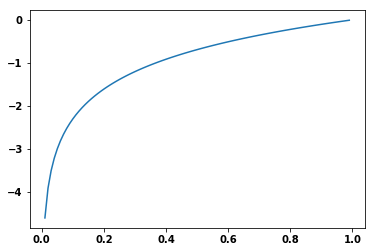

In [79]:
x = np.arange(0,1, 0.01)
y = np.log(x)
plt.plot(x,y)
plt.show()

In [80]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(delta + y))

In [81]:
t = [0, 0, 1, 0, 0, 0, 0 , 0 ,0 , 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [82]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

# mini-batch

In [83]:
Latex(r"$ E = -\frac{1}{N} \sum_{n}\sum_{k}{t_nklog_{y_nk}}$")

<IPython.core.display.Latex object>

In [84]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [85]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

In [86]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [87]:
train_size = x_train.shape[0]
print(train_size)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

60000
[33087 21234 31080  7348 40953  7372 26588 34910 54660  6154]


In [88]:
x_batch = x_train[batch_mask]
x_batch.shape

(10, 784)

In [89]:
t_batch = t_train[batch_mask]
t_batch.shape

(10, 10)

In [90]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t*np.log(delta + y)) / batch_size

# 数值微分

In [91]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

In [92]:
# y = 0.01 
Latex(r"$ y = 0.01x^2+0.1x$")

<IPython.core.display.Latex object>

In [93]:
def function_1(x):
    return 0.01*x**2+0.1*x

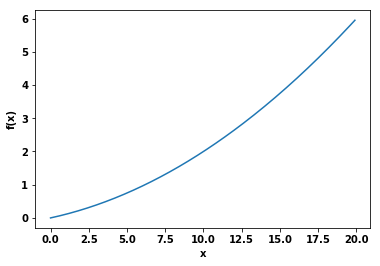

In [94]:

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [95]:
numerical_diff(function_1, 5)

0.1999999999990898

In [96]:
numerical_diff(function_1, 10)

0.2999999999986347

# 偏导数

In [97]:
def function_2(x):
    return x[0]**2 + x[1] ** 2
   #return np.sum(x**2)

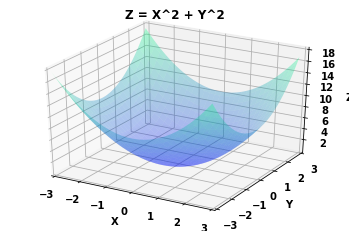

In [98]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X,Y = np.meshgrid(x,y)  
Z = X**2+Y**2
ax.plot_surface(X, Y, Z, alpha=0.3, cmap= plt.cm.winter)
ax.set_xlabel("X")
ax.set_xlim(-3,3)
ax.set_ylabel("Y")
ax.set_ylim(-3,3)
ax.set_zlabel("Z")
plt.title("Z = X^2 + Y^2")
plt.show()

In [99]:
Latex(r"$求 x_0 = 3，x_1 = 4时, 关于X_0的偏导 \frac{\partial f}{\partial x_0}$")

<IPython.core.display.Latex object>

In [100]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [101]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [102]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    print("grad:",grad)
    return grad

In [103]:
numerical_gradient(function_2, np.array([3.0,4.0]))

grad: [6. 8.]


array([6., 8.])

In [104]:
numerical_gradient(function_2, np.array([0.0,2.0]))

grad: [0. 4.]


array([0., 4.])

In [105]:
numerical_gradient(function_2, np.array([3.0,0.0]))

grad: [6. 0.]


array([6., 0.])

## 梯度下降

In [106]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [107]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [108]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

grad: [-6.  8.]
grad: [-4.8  6.4]
grad: [-3.84  5.12]
grad: [-3.072  4.096]
grad: [-2.4576  3.2768]
grad: [-1.96608  2.62144]
grad: [-1.572864  2.097152]
grad: [-1.2582912  1.6777216]
grad: [-1.00663296  1.34217728]
grad: [-0.80530637  1.07374182]
grad: [-0.64424509  0.85899346]
grad: [-0.51539608  0.68719477]
grad: [-0.41231686  0.54975581]
grad: [-0.32985349  0.43980465]
grad: [-0.26388279  0.35184372]
grad: [-0.21110623  0.28147498]
grad: [-0.16888499  0.22517998]
grad: [-0.13510799  0.18014399]
grad: [-0.10808639  0.14411519]
grad: [-0.08646911  0.11529215]
grad: [-0.06917529  0.09223372]
grad: [-0.05534023  0.07378698]
grad: [-0.04427219  0.05902958]
grad: [-0.03541775  0.04722366]
grad: [-0.0283342   0.03777893]
grad: [-0.02266736  0.03022315]
grad: [-0.01813389  0.02417852]
grad: [-0.01450711  0.01934281]
grad: [-0.01160569  0.01547425]
grad: [-0.00928455  0.0123794 ]
grad: [-0.00742764  0.00990352]
grad: [-0.00594211  0.00792282]
grad: [-0.00475369  0.00633825]
grad: [-0.003802

array([-6.11110793e-10,  8.14814391e-10])

# 神经网络的梯度

In [109]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error

In [116]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [117]:
net = simpleNet()
print(net.W)

[[-0.06474464  0.14098463 -0.06748269]
 [ 1.05991817  0.49410072 -0.21667311]]


In [118]:
x = np.array([0.6,0.9])
t = np.array([0, 0, 1])
p = net.predict(x)
print(p)

[ 0.91507957  0.52928143 -0.23549541]


In [119]:
np.argmax(p)

0

In [120]:
def f(W):
    return net.loss(x, t)

In [121]:
print(net.W)
print(f(net.W))

[[-0.06474464  0.14098463 -0.06748269]
 [ 1.05991817  0.49410072 -0.21667311]]
1.8419011345382745
